# Exploring the Seaborn flights dataset.

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
%matplotlib inline

Let's examine the dataset.

In [3]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


Let's plot a time series of passengers over the years.

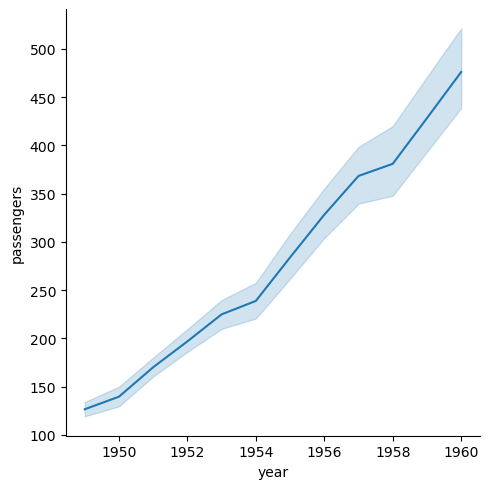

In [4]:
sns.relplot(x="year",y="passengers",kind="line",data=flights)

It just keeps going up! Let's plot the trend line as a regression.

<Axes: xlabel='year', ylabel='passengers'>

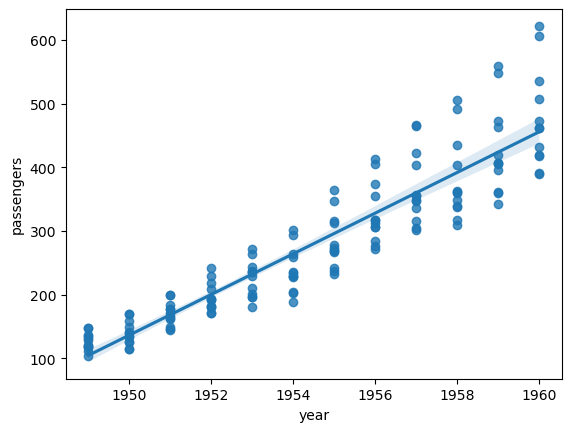

In [5]:
sns.regplot(x="year",y="passengers",data=flights)

Let's find the equation for this line.

In [7]:
import statsmodels.api as sm
year = flights["year"].to_numpy()
year = sm.add_constant(year)
passengers = flights["passengers"].to_numpy()

model = sm.OLS(passengers,year)
result = model.fit()
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     803.1
Date:                Thu, 02 Jan 2025   Prob (F-statistic):           2.58e-60
Time:                        19:52:40   Log-Likelihood:                -756.71
No. Observations:                 144   AIC:                             1517.
Df Residuals:                     142   BIC:                             1523.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.212e+04   2201.683    -28.213      0.0

Seems to be quite a strong correlation with a high R-squared number and the p-values of the constant and coefficient both 0. The equation is: $$y = -6.212\times10^4 + 31.924x$$

In [ ]:
What was the percentage growth of passgeners from 1959 to 1960?

flights_1959 = flights.loc[flights["year"] == 1959,"passengers"].sum()
flights_1960 = flights.loc[flights["year"] == 1960,"passengers"].sum()
(flights_1960 - flights_1959) / flights_1959

In [ ]:
So approximately 11 percent.

In [18]:
flights.loc[flights["year"] == 1960,"passengers"].tail()

139    606
140    508
141    461
142    390
143    432
Name: passengers, dtype: int64

And the previous two years:

In [20]:
flights_1958 = flights.loc[flights["year"] == 1958,"passengers"].sum()
flights_1959 = flights.loc[flights["year"] == 1959,"passengers"].sum()
(flights_1959 - flights_1958) / flights_1958

np.float64(0.1242344706911636)

So a pretty steady increase, similar to the graphs.